In [70]:
import numpy as np
import math
from estimates_calculations import Concept, MAP, MLE, MAP_value, MLE_value, MAP_arg, MLE_arg, likelihood_estimation, aposteriori_estimation
from matplotlib import pyplot as plt
from concepts_database import gen_base_concepts, odd, even, multiplies_of_N, powers_of_2

In [71]:
def gen_from_concept(concept, size):
    dataset = concept.gen_dataset()
    return np.random.choice(dataset, size=size)    

In [72]:
'''
concepts = [
    Concept('c4', lambda x: x in [1,2,3,4,11,12,13,14,22,44,49,55,77,88,110,121], 
            0.25),
    Concept('c0', lambda x: x in [1,11,22,33,44,55,66,77,88,99,110,121,132,143,154,165,176,187,198], 
            0.25),
    Concept('c1', lambda x: x in [22,44,66,88,110,132,154,176,198], 
            0.25),
    Concept('c2', lambda x: x in [1,11,33,55,77,99,121,143,165,187], 
            0.25),
    Concept('c3', lambda x: x in [11,22,44,55,77,88,110,121,143,154,176,187], 
            0.25)
]
'''
concepts = [
    Concept('even', lambda x: x%2==0, 
            0.8),
    Concept('six', lambda x: x%6==0, 
            0.1),
    Concept('twelve', lambda x: x%12==0, 
            0.15),
    Concept('three', lambda x: x%3==0, 
            0.1),
    Concept('odd', lambda x: x%2==1, 
            0.05)
]
#np.random.shuffle(concepts)
Concept.normalize_priors(concepts)

In [73]:
def decisions_for_nth_concept(n, max_size=50, data=None):
    sizes = np.asarray(list(range(0, max_size)))
    if data is None:
        data = gen_from_concept(concepts[n], max_size)
    else:
        sizes = np.asarray(list(range(0, len(data))))


    maps = [MAP_arg(data[:x], concepts) for x in sizes]
    mles = [MLE_arg(data[:x], concepts) for x in sizes]
    
    return sizes, maps, mles

def values_for_nth_concept(n, max_size=50, data=None):
    sizes = np.asarray(list(range(0, max_size)))
    if data is None:
        data = gen_from_concept(concepts[n], max_size)
    else:
        sizes = np.asarray(list(range(0, len(data))))

    maps = [MAP_value(data[:x], concepts) for x in sizes]
    mles = [MLE_value(data[:x], concepts) for x in sizes]
    
    return sizes, maps, mles

In [74]:
def plot_map_mle_decisions(n, max_size=50, data=None):
    sizes, maps, mles = decisions_for_nth_concept(n, max_size, data)
    plt.figure(figsize=(15,8))
    plt.ylim(0, len(concepts))
    #plt.scatter(sizes, maps, label='MAP')
    #plt.scatter(sizes+0.5, mles, label='MLE')
    plt.plot(maps, label='MAP')
    plt.plot(mles, label='MLE')
    plt.legend()
    
def plot_map_mle_values(n, max_size=500,data=None):
    sizes, maps, mles = values_for_nth_concept(n, max_size, data)
    plt.figure(figsize=(15,8))
    plt.plot(maps, label='MAP')
    plt.plot(mles, label='MLE')
    plt.legend()

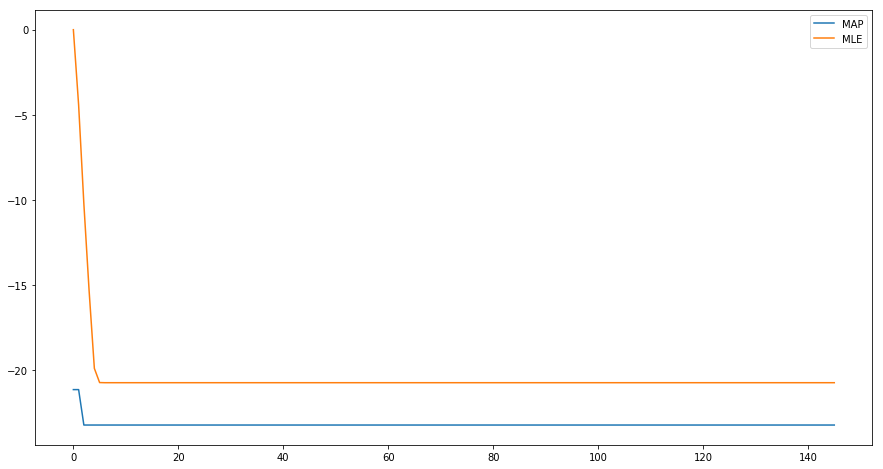

In [57]:
plot_map_mle_values(0)

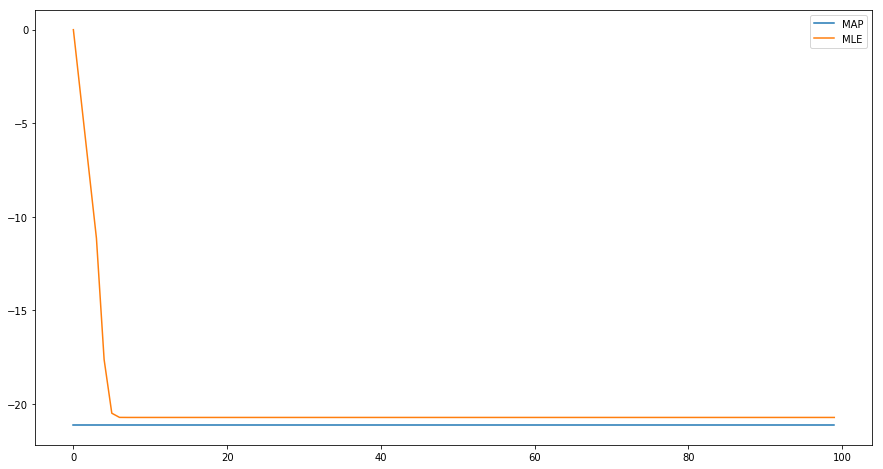

In [60]:
plot_map_mle_values(1, 100)

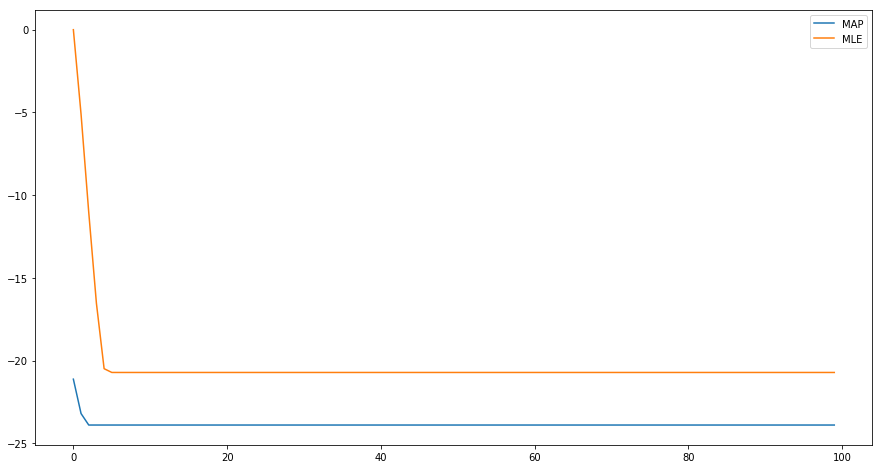

In [61]:
plot_map_mle_values(2, 100)

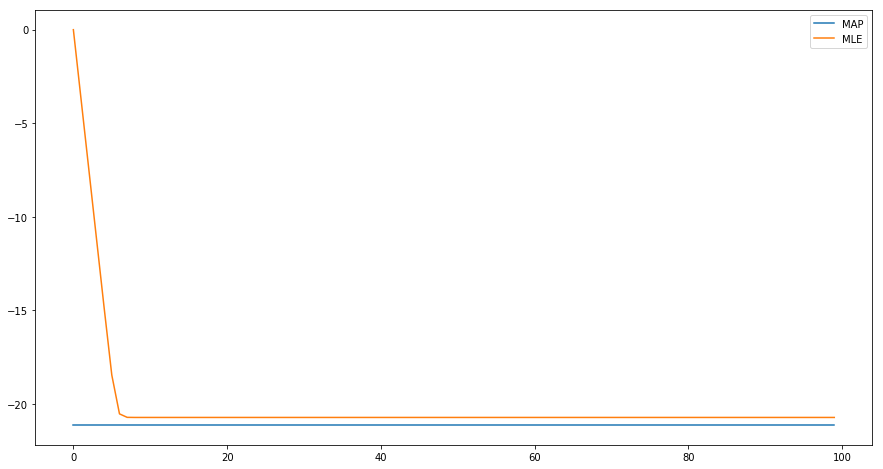

In [62]:
plot_map_mle_values(3, 100)

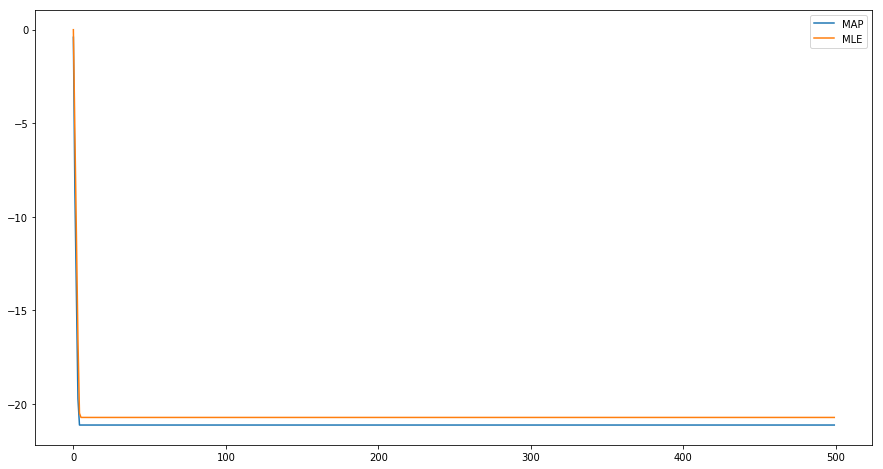

In [16]:
plot_map_mle_values(4)

In [37]:
np.random.shuffle(concepts)

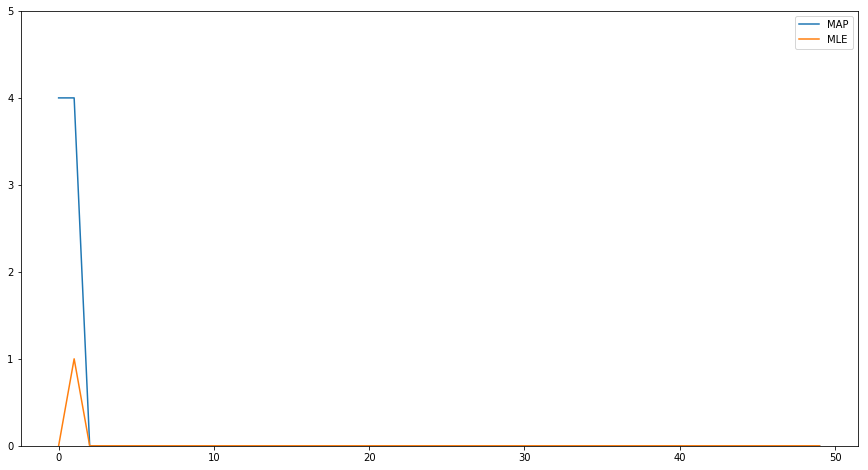

In [55]:
plot_map_mle_decisions(0, 50)

In [90]:
dd = [81]*1000#gen_from_concept(concepts[3], 1000)
print(MLE(dd, concepts).name)
print(MAP(dd, concepts).name)

even
even


In [94]:
likelihood([81]*100, concepts[3])

9.754189665740497e-223

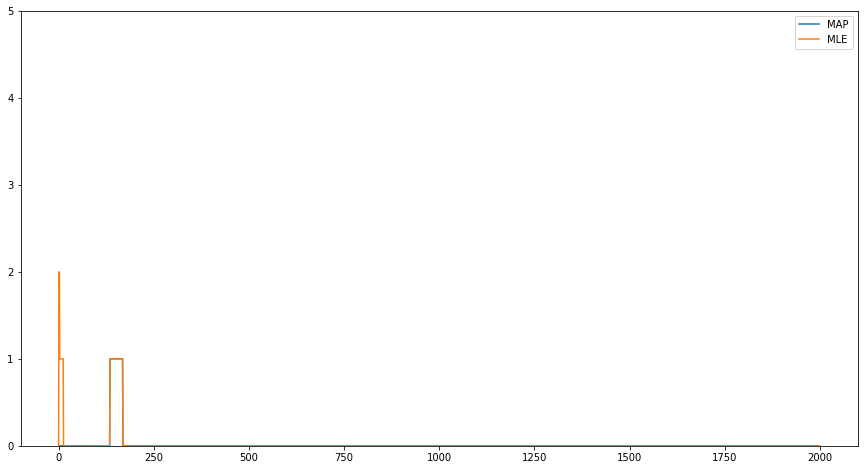

In [87]:
plot_map_mle_decisions(1, 2000)

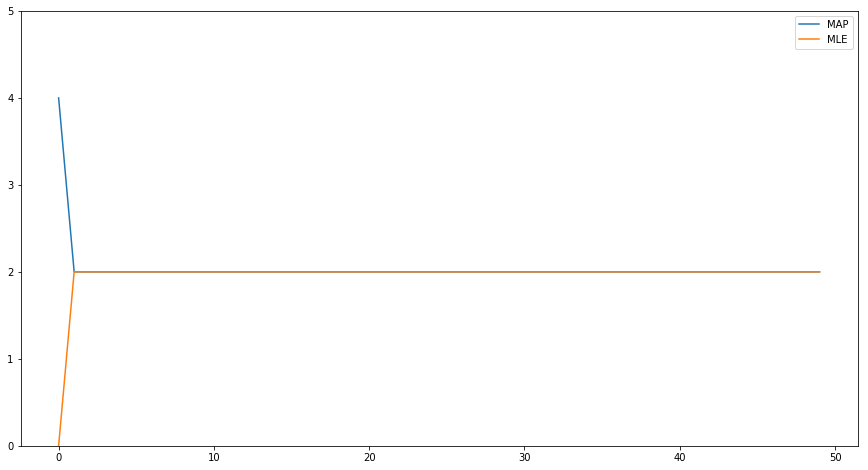

In [40]:
plot_map_mle_decisions(2)

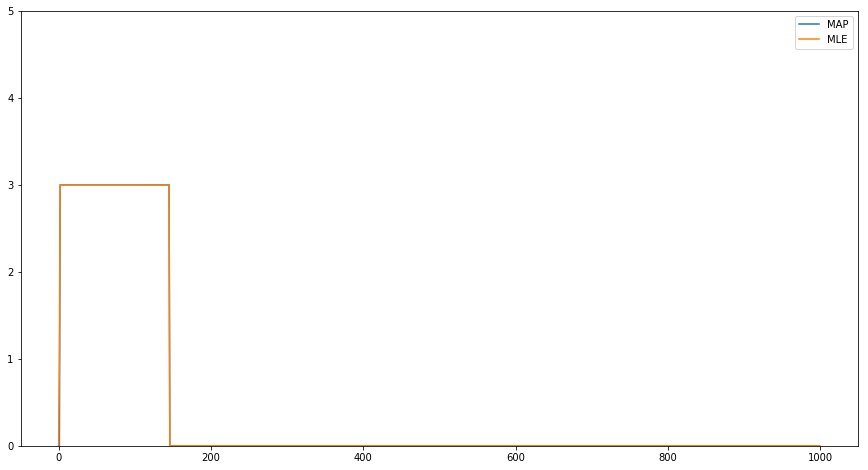

In [78]:
plot_map_mle_decisions(3, 1000)

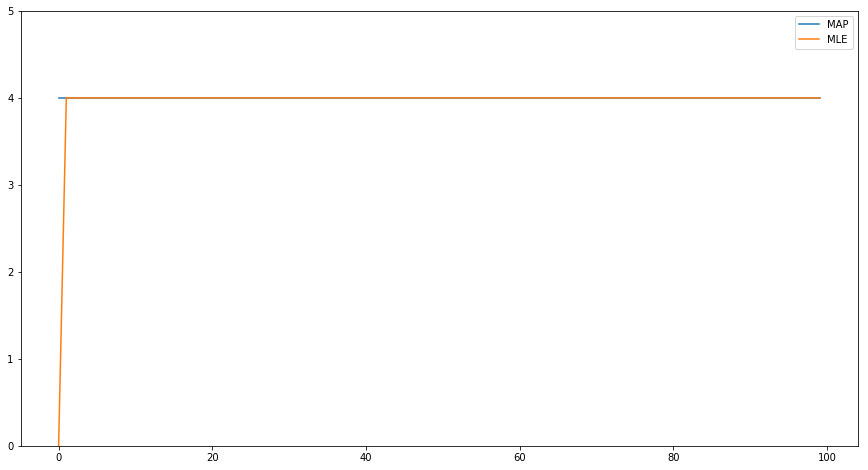

In [46]:
plot_map_mle_decisions(4, 100)

In [84]:
gen_from_concept(concepts[3], 1000)

array([ 39, 378, 156, 468, 243,  24, 123, 354, 294, 147,  18, 492, 258,
       408, 420, 357, 399, 318, 444, 417,  81, 435, 432, 495, 126, 264,
       477, 468, 252, 381, 147, 183, 435, 282, 111,  99,   3,  54, 417,
       279, 207, 399, 120, 345,  60, 321, 312, 396,   6, 111, 459,  63,
       240, 264, 174, 117,  48, 261, 456, 297, 243, 180,  78,  87, 141,
       267, 288, 330,  66, 348, 138,  87, 441, 108, 450,  96, 150, 462,
       186, 315, 276, 303, 405, 138, 261, 345, 462, 255, 441,  93, 195,
        45, 207, 474,  21, 336, 384, 357, 456, 180,  24, 147,  21, 420,
       372, 318, 309, 378, 321, 216, 345, 198, 453, 432, 360, 396,  87,
       258, 441, 432, 423, 492, 270, 222,  33,  48, 486, 237, 297, 231,
       285,  21, 168, 312, 297, 300, 408, 312, 282, 486, 237, 192, 387,
       357,  12, 204, 339,  54, 387, 219, 177, 111, 330, 372, 171, 297,
        81, 258, 171, 228, 237, 207,  63, 288,   6, 465, 462, 102, 282,
       426,  42, 336,  78, 102, 492, 396, 411, 417, 144, 192, 47